In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Specify the path to your Microsoft CSV file
file_path = r'C:\Users\pamar_1wl3que\Desktop\CarPrice_Assignment.csv'


# Read the CSV file
# Use appropriate encoding and delimiter if necessary
df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=',')  # Adjust 'sep' if needed

# Display the first few rows
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

Predicted prices for test data:
[ 7105.12989215 -5362.71441714 -6144.92595279 -2875.315697
 11660.3417347  -4978.54751492 -2714.11513118  9912.40170311
 -3918.20234805  7826.86251258 -3899.53489451  6963.3895359
  8080.65946032  6453.32991786 16664.81480554 16740.98763032
  3126.64942742  1444.89764028 -8583.67690008 -8446.76214215
 -7890.17715407 -7753.26239614 -7665.04047434 -6787.28340106
 -7124.53721319 -9148.25079279 -9188.32465441 -1049.79128461
 -5476.69595743 -7823.07927549 -2460.8788422  -3693.47079632
 -2559.33915298 -3771.10841756  -348.29612918 -1549.71887381
 -1670.44152296   714.40314114  5149.47424853  2313.98631657
  -645.4329217 ]
Mean Squared Error on test set: 236442589.88645554


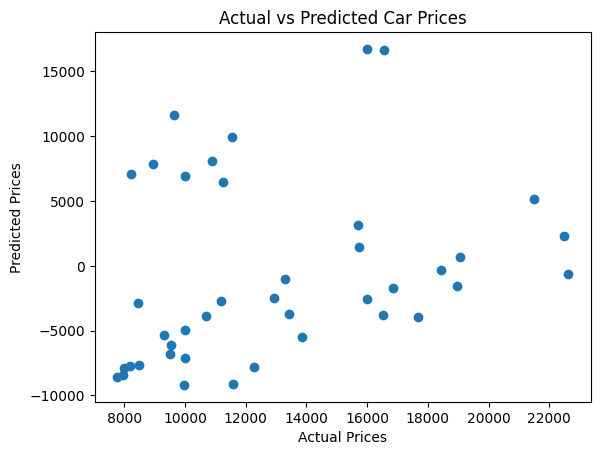

In [12]:
# Step 2: Data Preprocessing
# Drop rows with missing values (if any)
df = df.dropna()

# Convert categorical variables to numeric (if necessary)
# This assumes there are categorical variables that need encoding
df = pd.get_dummies(df, drop_first=True)

# Normalize the features (optional but helps with faster convergence)
# Here we're normalizing by subtracting the mean and dividing by the standard deviation
df_features = df.drop('price', axis=1)  # Drop target column
df_features = (df_features - df_features.mean()) / df_features.std()

# Assign features to X and the target variable (price) to y
X = df_features.values
y = df['price'].values

# Step 3: Train-Test Split
# Splitting the dataset into 80% training and 20% testing
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Implement Linear Regression from Scratch
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None  # Parameters for the model
    
    def fit(self, X, y):
        # Add bias (intercept term) to X
        X = np.insert(X, 0, 1, axis=1)  # Add a column of 1s to account for the bias term
        self.theta = np.zeros(X.shape[1])  # Initialize theta (parameters) with zeros
        m = len(y)  # Number of training examples
        
        # Gradient Descent Algorithm
        for _ in range(self.iterations):
            y_pred = X.dot(self.theta)  # Prediction using current parameters
            error = y_pred - y  # Calculate the error
            gradient = (1/m) * X.T.dot(error)  # Compute the gradient
            self.theta -= self.learning_rate * gradient  # Update the parameters
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add the bias term for prediction
        return X.dot(self.theta)

# Step 5: Train the Model
model = LinearRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

# Step 6: Predict on Test Data
y_pred = model.predict(X_test) 
# Print predicted prices
print("Predicted prices for test data:")
print(y_pred)


# Step 7: Evaluate the Model (Mean Squared Error)
mse = np.mean((y_pred - y_test) ** 2)
print(f'Mean Squared Error on test set: {mse}')

# Step 8: Visualize Predictions vs Actual Values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()